<a href="https://colab.research.google.com/github/Jeo-Jeo/Task-6/blob/main/Task_6_K_Nearest_Neighbors_(KNN)_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Try k=3, 5, 7
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



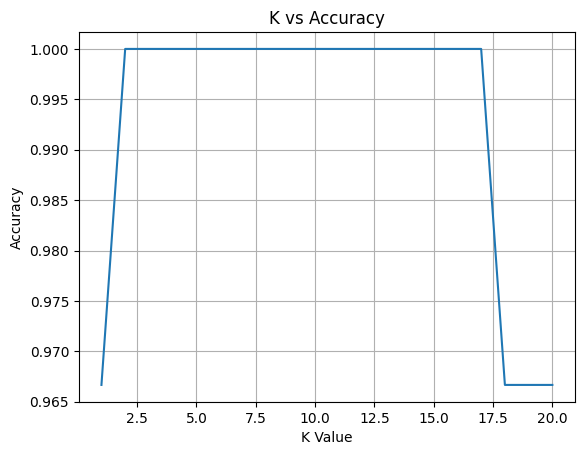

In [ ]:
k_range = range(1, 21)
accuracy_scores = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred_k = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred_k)
    accuracy_scores.append(acc)

plt.plot(k_range, accuracy_scores)
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('K vs Accuracy')
plt.grid()
plt.show()


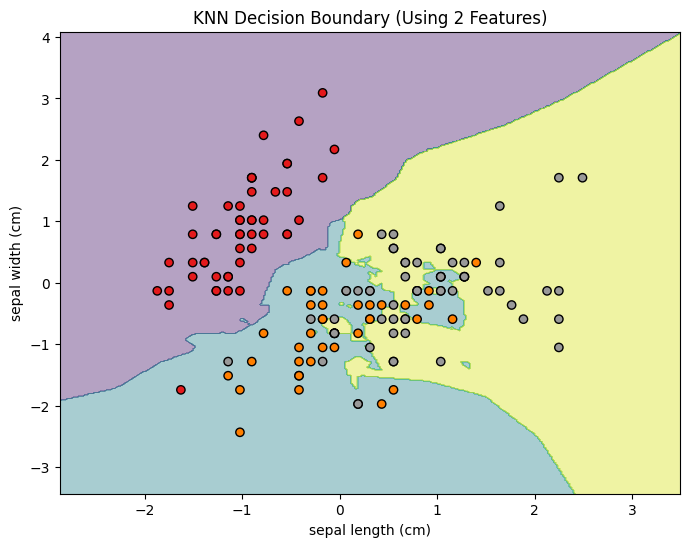

In [ ]:
# Use only first two features for visualization
X_vis = X_scaled[:, :2]

X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X_vis, y, test_size=0.2, random_state=42)
knn_viz = KNeighborsClassifier(n_neighbors=5)
knn_viz.fit(X_train_v, y_train_v)

# Decision boundary plotting
h = .02  # step size
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn_viz.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, edgecolor='k', cmap=plt.cm.Set1)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("KNN Decision Boundary (Using 2 Features)")
plt.show()


In [ ]:
df.to_csv("iris_processed.csv", index=False)